In [4]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
# read in the data 
data = pd.read_csv('../data/processed/Cleaned_Data.csv')

In [6]:
# print the number of 0s in the new column
print(data['Severe_crimes'].value_counts())

Severe_crimes
0    75556
1     5373
Name: count, dtype: int64


In [7]:


# use the 2024 data as testing data
test_data = data[data["YEAR"] == 2024]

# use train test split to split the data into training and validation data
train_data, val_data = train_test_split(data[data["YEAR"] != 2024], test_size=0.2)

# save the data
train_data.to_csv("../data/processed/train_data.csv", index=False)
val_data.to_csv("../data/processed/val_data.csv", index=False)
test_data.to_csv("../data/processed/test_data.csv", index=False)



In [8]:
# describe the data
print("Training Data")
print(train_data.describe())

Training Data
                _id  OFFENSE_CODE      SHOOTING     YEAR         MONTH  \
count  61877.000000  61877.000000  61877.000000  61877.0  61877.000000   
mean   39009.566123   2338.348320      0.008274   2023.0      6.615221   
std    22533.446564   1175.883707      0.090588      0.0      3.414427   
min        1.000000    111.000000      0.000000   2023.0      1.000000   
25%    19361.000000   1106.000000      0.000000   2023.0      4.000000   
50%    39088.000000   2907.000000      0.000000   2023.0      7.000000   
75%    58457.000000   3201.000000      0.000000   2023.0     10.000000   
max    81131.000000   3831.000000      1.000000   2023.0     12.000000   

               HOUR  Severe_crimes  
count  61877.000000   61877.000000  
mean      12.484429       0.067473  
std        6.572099       0.250841  
min        0.000000       0.000000  
25%        8.000000       0.000000  
50%       13.000000       0.000000  
75%       18.000000       0.000000  
max       23.000000    

In [9]:
# print number of 1 and 0 s in the trainning data Severe_crimes column
print("Number of 1s and 0s in the training data")
print(train_data["Severe_crimes"].value_counts())


Number of 1s and 0s in the training data
Severe_crimes
0    57702
1     4175
Name: count, dtype: int64


(array([57702.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

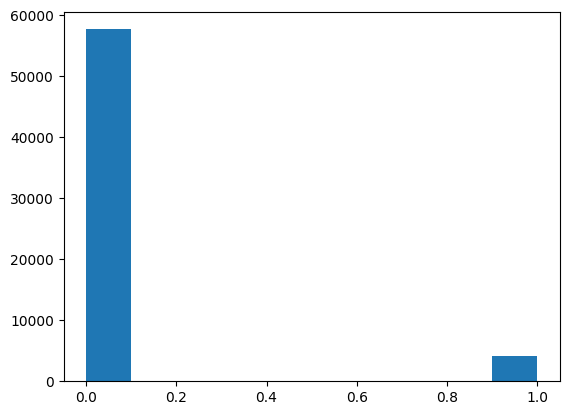

In [10]:
# do a EDA on the data
# plot the distribution of the target variable
plt.hist(train_data["Severe_crimes"])

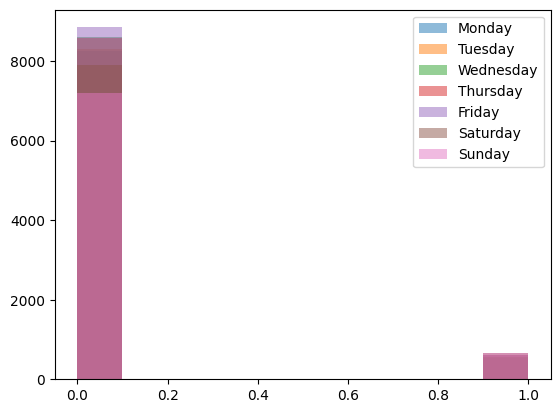

In [11]:
# more EDA
# plot the distribution of the target variable by day of the week
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Monday"]["Severe_crimes"], alpha=0.5, label="Monday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Tuesday"]["Severe_crimes"], alpha=0.5, label="Tuesday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Wednesday"]["Severe_crimes"], alpha=0.5, label="Wednesday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Thursday"]["Severe_crimes"], alpha=0.5, label="Thursday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Friday"]["Severe_crimes"], alpha=0.5, label="Friday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Saturday"]["Severe_crimes"], alpha=0.5, label="Saturday")
plt.hist(train_data[train_data["DAY_OF_WEEK"] == "Sunday"]["Severe_crimes"], alpha=0.5, label="Sunday")
plt.legend()
# save the plot
plt.savefig("../reports/figures/Severe_crimes_by_day_of_week.png")

plt.show()




In [12]:
# print all the column names
print(train_data.columns)

Index(['_id', 'OFFENSE_CODE', 'OFFENSE_DESCRIPTION', 'DISTRICT',
       'REPORTING_AREA', 'SHOOTING', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH',
       'DAY_OF_WEEK', 'HOUR', 'STREET', 'Severe_crimes'],
      dtype='object')


In [13]:
# more EDA
# analyze the relationship between the target variable and district
districts = train_data["DISTRICT"].unique()
for district in districts:
    print(district)
    print(train_data[train_data["DISTRICT"] == district]["Severe_crimes"].value_counts())

# more EDA


C6
Severe_crimes
0    4841
1     389
Name: count, dtype: int64
E13
Severe_crimes
0    3516
1     198
Name: count, dtype: int64
D4
Severe_crimes
0    7645
1     597
Name: count, dtype: int64
E5
Severe_crimes
0    2837
1     114
Name: count, dtype: int64
B3
Severe_crimes
0    5805
1     489
Name: count, dtype: int64
E18
Severe_crimes
0    3160
1     194
Name: count, dtype: int64
C11
Severe_crimes
0    6719
1     482
Name: count, dtype: int64
A1
Severe_crimes
0    6988
1     649
Name: count, dtype: int64
D14
Severe_crimes
0    4305
1     210
Name: count, dtype: int64
A7
Severe_crimes
0    3063
1     172
Name: count, dtype: int64
A15
Severe_crimes
0    1065
1      47
Name: count, dtype: int64
B2
Severe_crimes
0    7702
1     627
Name: count, dtype: int64
External
Severe_crimes
0    55
1     6
Name: count, dtype: int64
Outside of
Severe_crimes
0    1
1    1
Name: count, dtype: int64


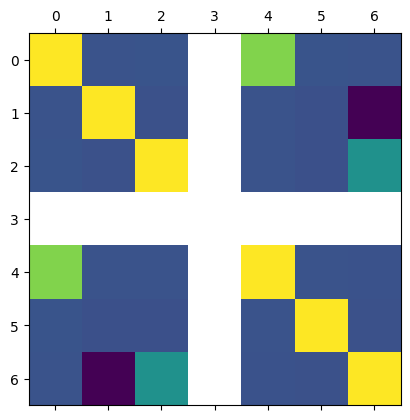

In [14]:
# draw a correlation matrix for the data
# draw all column names that are not strings

# get the columns that are numbers
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = train_data.select_dtypes(include=numerics).columns
# draw the correlation matrix
correlation_matrix = train_data[numeric_columns].corr()
plt.matshow(correlation_matrix)

# save the plot
plt.savefig("../reports/figures/correlation_matrix.png")

plt.show()



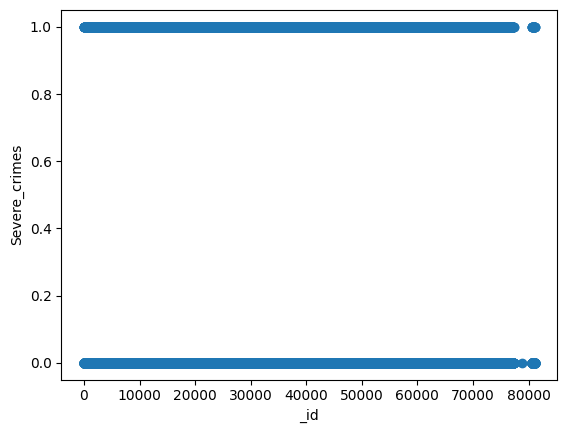

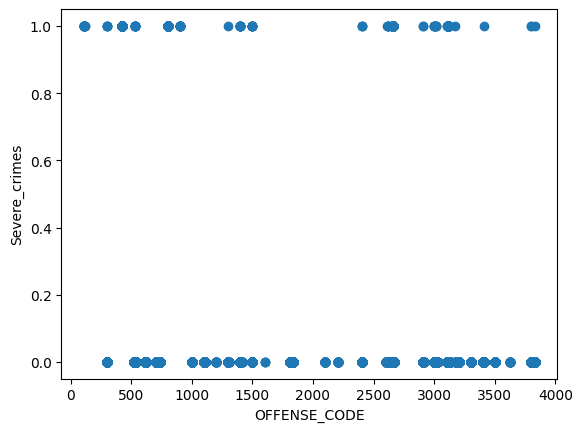

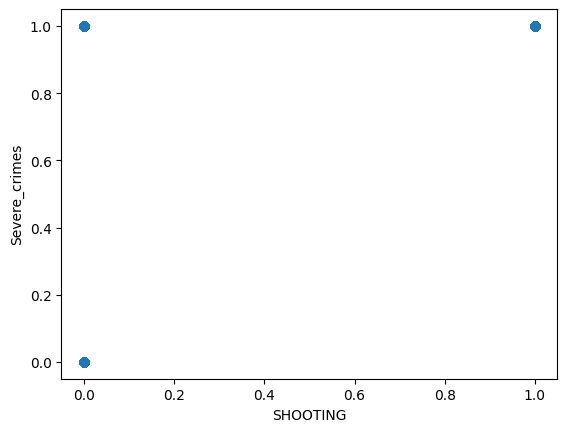

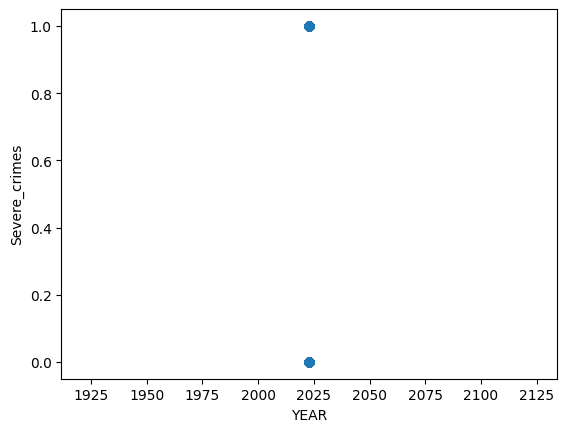

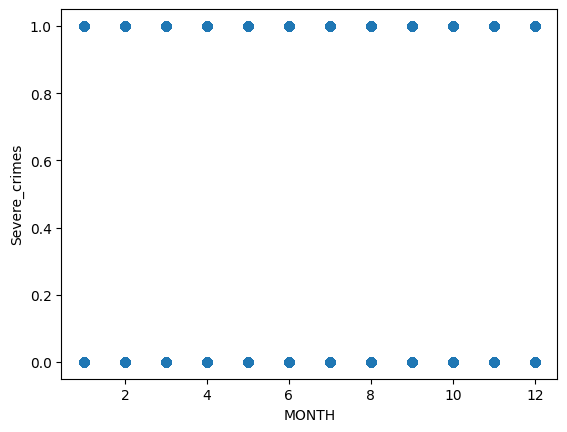

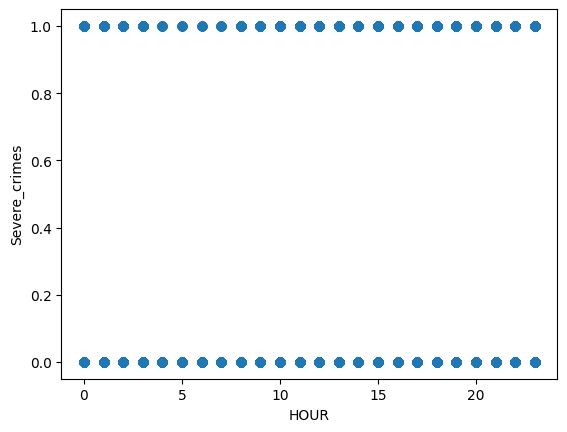

In [15]:
# Bivariate analysis of the data
# plot the relationship between the target variable and the other variables
# plot the relationship between the target variable and the district
for column in numeric_columns:
    if column != "Severe_crimes":
        plt.scatter(train_data[column], train_data["Severe_crimes"])
        plt.xlabel(column)
        plt.ylabel("Severe_crimes")
        plt.show()

        

C6
Severe_crimes
0    4841
1     389
Name: count, dtype: int64
E13
Severe_crimes
0    3516
1     198
Name: count, dtype: int64
D4
Severe_crimes
0    7645
1     597
Name: count, dtype: int64
E5
Severe_crimes
0    2837
1     114
Name: count, dtype: int64
B3
Severe_crimes
0    5805
1     489
Name: count, dtype: int64
E18
Severe_crimes
0    3160
1     194
Name: count, dtype: int64
C11
Severe_crimes
0    6719
1     482
Name: count, dtype: int64
A1
Severe_crimes
0    6988
1     649
Name: count, dtype: int64
D14
Severe_crimes
0    4305
1     210
Name: count, dtype: int64
A7
Severe_crimes
0    3063
1     172
Name: count, dtype: int64
A15
Severe_crimes
0    1065
1      47
Name: count, dtype: int64
B2
Severe_crimes
0    7702
1     627
Name: count, dtype: int64
External
Severe_crimes
0    55
1     6
Name: count, dtype: int64
Outside of
Severe_crimes
0    1
1    1
Name: count, dtype: int64


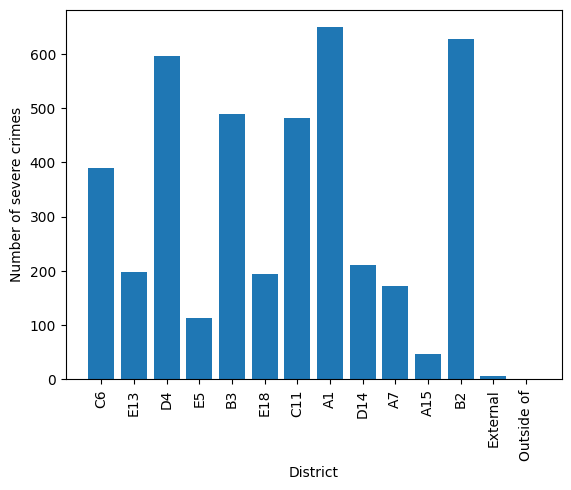

In [16]:
# EDA
# plot the number of severe crimes by district
districts = train_data["DISTRICT"].unique()
for district in districts:
    print(district)
    print(train_data[train_data["DISTRICT"] == district]["Severe_crimes"].value_counts())

# plot both the number of severe crimes by district in one plot
severe_crimes = []
for district in districts:
    severe_crimes.append(train_data[train_data["DISTRICT"] == district]["Severe_crimes"].value_counts()[1])

plt.bar(districts, severe_crimes)
plt.xlabel("District")
plt.ylabel("Number of severe crimes")
plt.xticks(rotation=90)
# save the plot
plt.savefig("../reports/figures/severe_crimes_by_district.png")

plt.show()




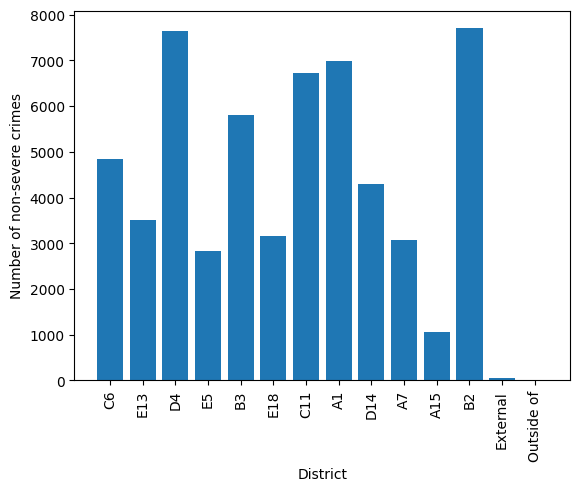

In [17]:
# plot the number of non-severe crimes by district
non_severe_crimes = []
for district in districts:
    non_severe_crimes.append(train_data[train_data["DISTRICT"] == district]["Severe_crimes"].value_counts()[0])

plt.bar(districts, non_severe_crimes)
plt.xlabel("District")
plt.ylabel("Number of non-severe crimes")
plt.xticks(rotation=90)

# save the plot
plt.savefig("../reports/figures/non_severe_crimes_by_district.png")
plt.show()


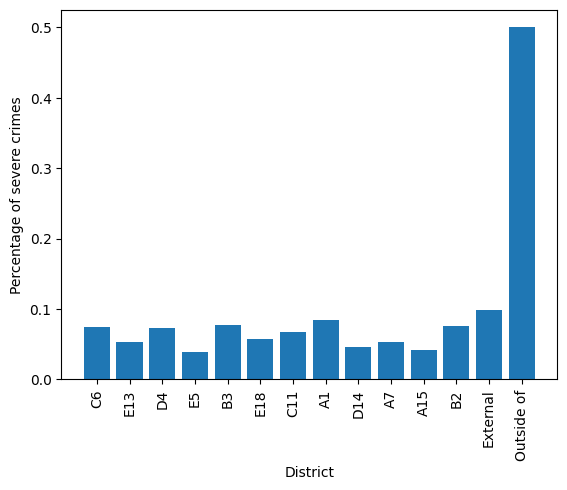

In [18]:
# do a percentage of severe crimes by district
percentage_severe_crimes = []
for i in range(len(districts)):
    percentage_severe_crimes.append(severe_crimes[i] / (severe_crimes[i] + non_severe_crimes[i]))

plt.bar(districts, percentage_severe_crimes)
plt.xlabel("District")
plt.ylabel("Percentage of severe crimes")
plt.xticks(rotation=90)
# save the plot
plt.savefig("../reports/figures/percentage_severe_crimes_by_district.png")

plt.show()

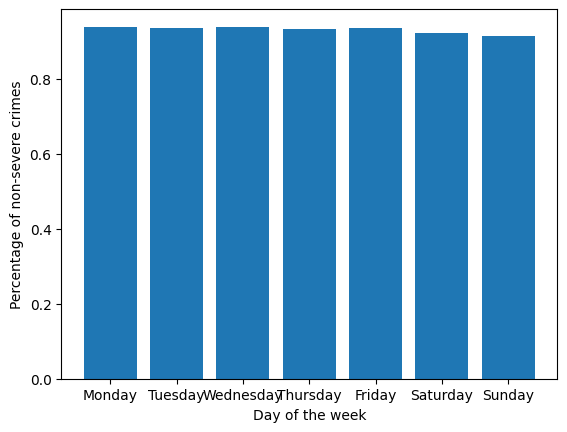

In [19]:
# do a percentage of non-severe crimes by day of the week
percentage_non_severe_crimes = []

for day in ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]:
    percentage_non_severe_crimes.append(train_data[train_data["DAY_OF_WEEK"] == day]["Severe_crimes"].value_counts()[0] / train_data[train_data["DAY_OF_WEEK"] == day]["Severe_crimes"].value_counts().sum())

plt.bar(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], percentage_non_severe_crimes)
plt.xlabel("Day of the week")
plt.ylabel("Percentage of non-severe crimes")
# save the plot
plt.savefig("../reports/figures/percentage_non_severe_crimes_by_day_of_week.png")

plt.show()

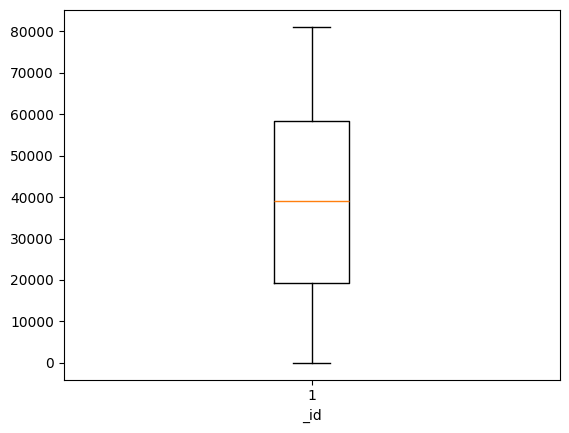

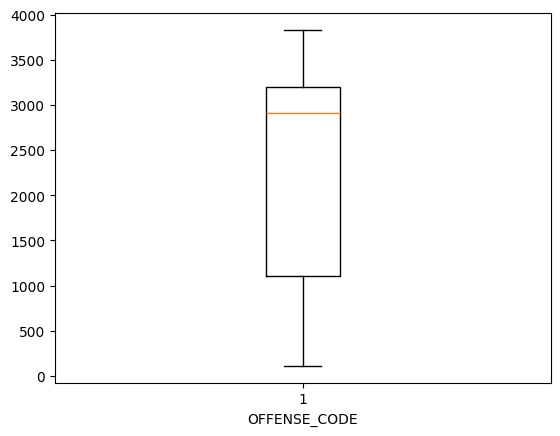

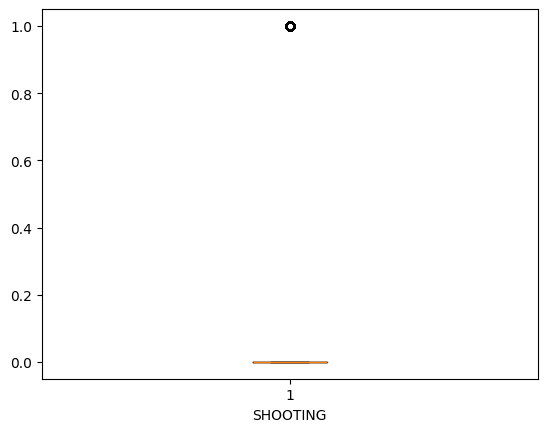

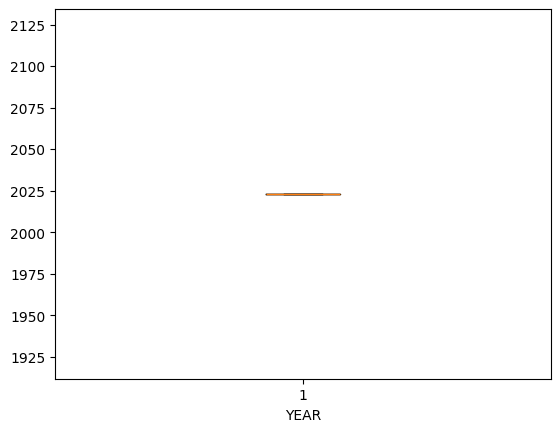

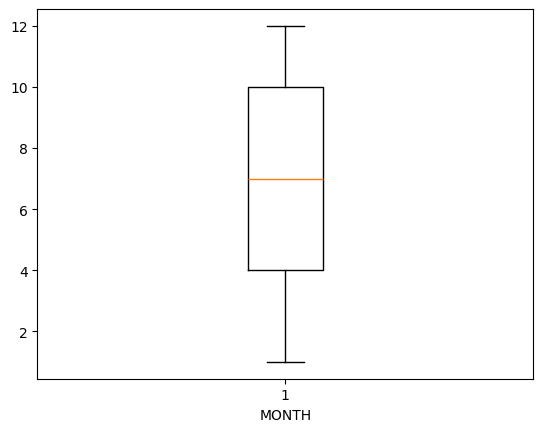

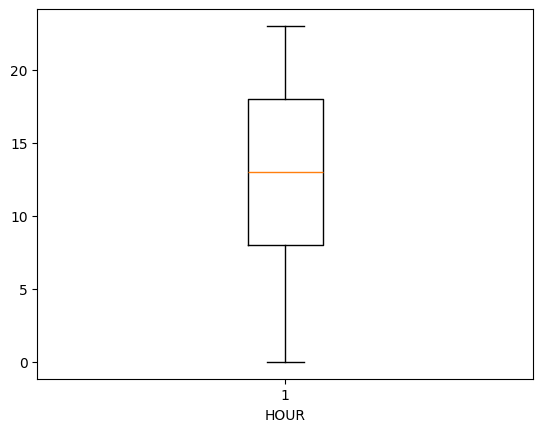

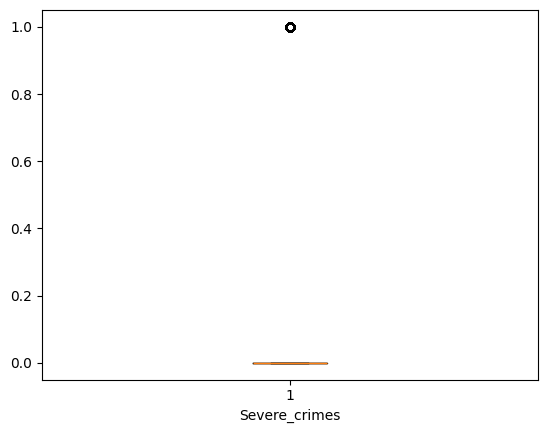

In [20]:
# test for outliers
# plot the box plot for the numeric columns
for column in numeric_columns:
    plt.boxplot(train_data[column])
    plt.xlabel(column)
    plt.show()

